In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gd

In [38]:
lin = pd.read_csv("C:/Users/La licorne/Desktop/resourceful/patient-data-anonymisation-exercise.csv")

In [39]:
lin.head()

,PATIENT_ID,START,STOP,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,BIRTHDATE,DEATHDATE,...,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
0,034e9e3b-2def-4559-bb2a-7850888ae060,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
1,034e9e3b-2def-4559-bb2a-7850888ae060,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
2,034e9e3b-2def-4559-bb2a-7850888ae060,2015-01-26T17:45:28Z,2015-01-26T18:15:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
3,034e9e3b-2def-4559-bb2a-7850888ae060,2016-12-29T17:45:28Z,2016-12-29T18:00:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
4,034e9e3b-2def-4559-bb2a-7850888ae060,2017-01-09T17:45:28Z,2017-01-09T18:00:28Z,outpatient,Encounter for check up (procedure),129.16,54.16,NaN,14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531


In [40]:
lin[lin["PATIENT_ID"] == "034e9e3b-2def-4559-bb2a-7850888ae060"]

,PATIENT_ID,START,STOP,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,BIRTHDATE,DEATHDATE,...,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
0,034e9e3b-2def-4559-bb2a-7850888ae060,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
1,034e9e3b-2def-4559-bb2a-7850888ae060,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
2,034e9e3b-2def-4559-bb2a-7850888ae060,2015-01-26T17:45:28Z,2015-01-26T18:15:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
3,034e9e3b-2def-4559-bb2a-7850888ae060,2016-12-29T17:45:28Z,2016-12-29T18:00:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
4,034e9e3b-2def-4559-bb2a-7850888ae060,2017-01-09T17:45:28Z,2017-01-09T18:00:28Z,outpatient,Encounter for check up (procedure),129.16,54.16,NaN,14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
5,034e9e3b-2def-4559-bb2a-7850888ae060,2018-01-29T17:45:28Z,2018-01-29T18:00:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531


In [41]:
lin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53346 entries, 0 to 53345
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PATIENT_ID         53346 non-null  object 
 1   START              53346 non-null  object 
 2   STOP               53346 non-null  object 
 3   ENCOUNTERCLASS     53346 non-null  object 
 4   DESCRIPTION        53346 non-null  object 
 5   TOTAL_CLAIM_COST   53346 non-null  float64
 6   PAYER_COVERAGE     53346 non-null  float64
 7   REASONDESCRIPTION  13777 non-null  object 
 8   BIRTHDATE          53346 non-null  object 
 9   DEATHDATE          14287 non-null  object 
 10  SSN                53346 non-null  object 
 11  DRIVERS            49285 non-null  object 
 12  PASSPORT           46965 non-null  object 
 13  FIRST              53346 non-null  object 
 14  LAST               53346 non-null  object 
 15  MAIDEN             16597 non-null  object 
 16  MARITAL            436

In [42]:
gdl = gd.GeoDataFrame(lin, crs="EPSG:4326", geometry=gd.points_from_xy(lin.LON, lin.LAT))

C:\Users\La licorne\.conda\envs\lingeo\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Wall time: 25.4 s


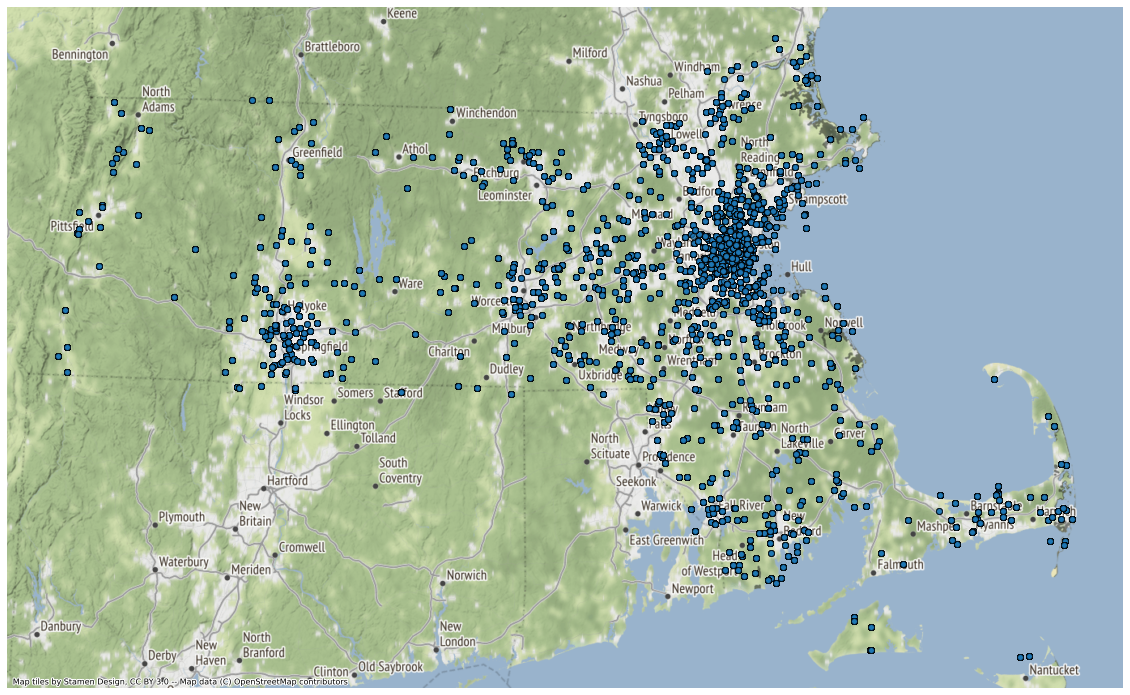

In [43]:
%%time

import contextily as ctx

# reproject
gdl = gdl.to_crs(epsg=3857)
ax = gdl.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax)
ax.set_axis_off()


In [44]:
# Préciser les colonnes pour l'éloignement
suppression = ["SSN", "DRIVERS", "PASSPORT", "FIRST", "LAST", "MAIDEN", "ADDRESS", "ZIP"]
# Et les laisser tomber
lin.drop(suppression, axis=1, inplace=True)

In [45]:
#GENERER UN CODE D'IDENTITE UNIQUE
import uuid

str(uuid.uuid4())

'ddb965ac-8a9e-482c-aea0-35ba47c39e6d'

In [46]:
import numpy as np
sigma = 0.001 # l'écart-type, c'est-à-dire le degré de variation par rapport aux données originales que nous autorisons
mu = 1 # les données originales, considérées comme la "moyenne"

np.random.normal(mu, sigma)

1.0002868298092413

In [47]:
from collections import defaultdict

class Pseudonymise:
    
    def __init__(self, sigma=0.001):
        # Initialiser un dictionnaire par défaut, cela crée un élément de dictionnaire par défaut s'il n'existe pas
        # Nous utilisons cette méthode pour garantir l'intégrité des données tout en les rendant aléatoires
        # http://ikigomu.com/?p=28
        self.sigma = sigma
        self.mu = 0 # Nous voulons nous écarter de la vérité
        # Pseudo-patient dict
        self.pp = defaultdict(lambda: {"uuid":str(uuid.uuid4()),
                                       "lat": np.random.normal(self.mu, self.sigma),
                                       "lon": np.random.normal(self.mu, self.sigma)
                                      })
        
    def create_data(self, identities):
        for _id in identities:
            self.pp[_id]
        return self.pp
    def redact(self, row):
        return [
            self.pp[row["PATIENT_ID"]]["uuid"],
            row["LAT"] + self.pp[row["PATIENT_ID"]]["lat"],
            row["LON"] + self.pp[row["PATIENT_ID"]]["lon"],
        ]
    
p = Pseudonymise()
pp_data = p.create_data(lin["PATIENT_ID"])
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
fields = ["PATIENT_ID", "LAT", "LON"]
lin[fields] = lin[fields].apply(p.redact, axis=1, result_type="expand")

C:\Users\La licorne\.conda\envs\lingeo\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


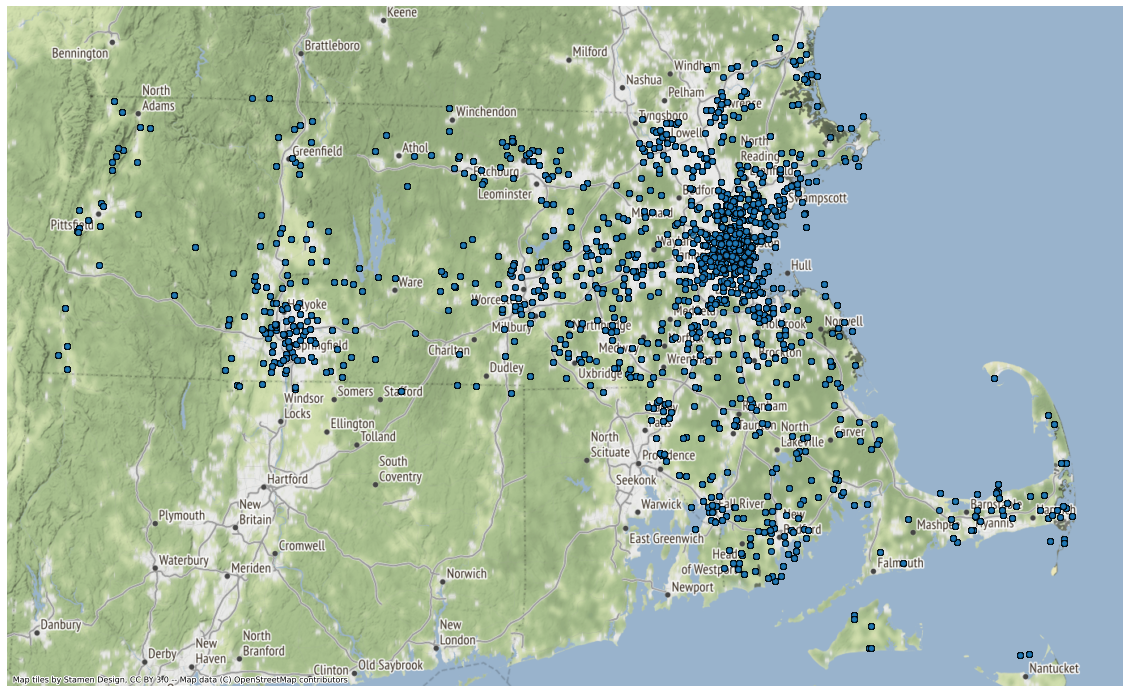

In [48]:
gdl = gd.GeoDataFrame(lin, crs="EPSG:4326", geometry=gd.points_from_xy(lin.LON, lin.LAT))
gdl = gdl.to_crs(epsg=3857)
ax = gdl.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax)
ax.set_axis_off()

Wall time: 2min 2s


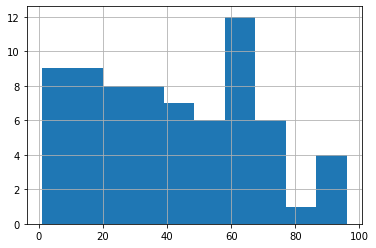

In [49]:
%%time

lin = lin.copy()
# Convertir les champs de date en dates de pandas
for c in ["START", "STOP", "BIRTHDATE", "DEATHDATE"]:
    lin[c] = lin[c].apply(lambda x: pd.to_datetime(x, errors="coerce", dayfirst=True).date())
# Filtre pour le traitement médical final pour tous les patients décédés
lin = lin[lin.STOP==lin.DEATHDATE]
lin.sort_values(by="STOP", inplace=True)
lin.drop_duplicates(subset="PATIENT_ID", keep="last", inplace=True)
# Créer le DEATHAGE 
# Il s'agit d'un calcul TRÈS approximatif de l'âge au décès
lin["DEATHAGE"] = lin.DEATHDATE.apply(lambda x: x.year) - lin.BIRTHDATE.apply(lambda x: x.year)
# Et tirez la répartition des décès, divisée en n bacs
lin["DEATHAGE"].hist(bins=10)

In [50]:
lin["DEATHAGE"]

17464    13
6574      4
39451    17
52548    10
21413    25
         ..
48996    63
1813     20
38205    71
35080    65
7988      1
Name: DEATHAGE, Length: 70, dtype: int64

In [51]:
#birthdate pour la generalisation et pour moins de precision j'ai remplacé la date de naissance par l'année de naissance 

import datetime
def annee_uniquement(value):
    return value.year

def annee_uniquement_death(value):
    return value.year

lin["DEATHDATE"]=lin["DEATHDATE"].apply(annee_uniquement_death)
lin["BIRTHDATE"]=lin["BIRTHDATE"].apply(annee_uniquement)

In [52]:
lin["DEATHDATE"]

17464    1926
6574     1927
39451    1958
52548    1962
21413    1967
         ... 
48996    2017
1813     2017
38205    2018
35080    2019
7988     2019
Name: DEATHDATE, Length: 70, dtype: int64

In [53]:
lin["BIRTHDATE"]

17464    1913
6574     1923
39451    1941
52548    1952
21413    1942
         ... 
48996    1954
1813     1997
38205    1947
35080    1954
7988     2018
Name: BIRTHDATE, Length: 70, dtype: int64